# Analysis and plotting

In [6]:
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from ipywidgets import IntText, RadioButtons, Button
import numpy as np

## Variables

In [2]:
RESULTS_FOLDER = "../results"
CONFIG_INDEX_NAME = "config_index.csv"
CONFIG_SAVING_NAME = "config.json"
ACCURACY_SAVING_NAME = "accuracies.csv"

## Loading set of all registered configs

In [3]:
df_configs = pd.read_csv(os.path.join(RESULTS_FOLDER, CONFIG_INDEX_NAME))
df_configs

,config_idx,in_dim,hidden_dim,out_dim,k,dataset,ds_size,num_gondolas,num_part_pg,loss_name,optimizer_name,num_max_epochs,learning_rate,batch_size,early_stop_tol,use_equal_batcher,seed,label_type,final_label_factor
0,0,15,128,1,2,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,default,0.001
1,1,15,128,1,2,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,tree,0.001
2,2,15,128,1,1,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,tree,0.001
3,3,15,128,1,3,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,tree,0.001
4,4,15,128,1,4,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,tree,0.001
5,5,15,128,1,5,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,tree,0.001
6,6,15,128,1,1,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,default,0.001
7,7,15,128,1,3,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,default,0.001
8,8,15,128,1,4,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,default,0.001
9,9,15,128,1,5,0,10000,10,5,mse,adam,100,0.001,1024,5,False,420,default,0.001


## Plotting single config

In [4]:
def plot_config(ax, config_idx, what, y_lower, y_up):
    ax.cla()
    # load data
    STORAGE_FOLDER = os.path.join(RESULTS_FOLDER, str(config_idx))
    df_measures = pd.read_csv(os.path.join(STORAGE_FOLDER, ACCURACY_SAVING_NAME))

    # Plot the initial data
    for config_id in df_measures.config_id.unique():
        # make subdataset for config id
        sub_df = df_measures[df_measures.config_id == config_id]

        # plot train test and val
        for mode in ['train', 'test', 'val']:
            # plot training
            ax.plot(sub_df.epoch, sub_df[f"{mode}_{what}"], label=f"{config_id}_{mode}-{what}")
    
    ax.set_title(f"{what} plot")
    ax.set_xlabel("epoch")
    ax.set_ylabel("score")
    ax.set_ylim(y_lower, y_up)
    ax.legend()

<IPython.core.display.Javascript object>


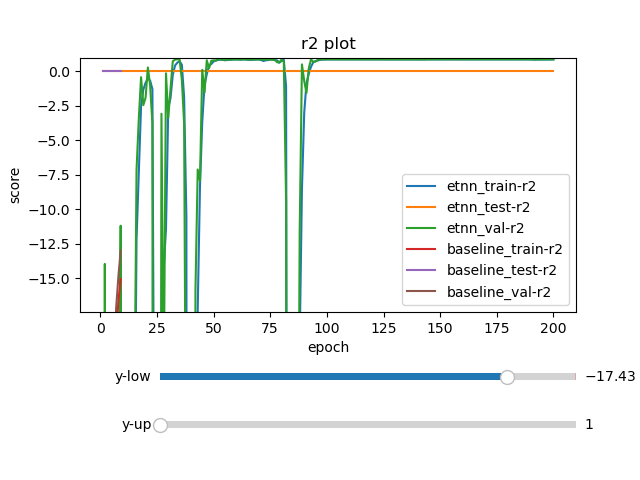

IntText(value=0, description='config-idx: ')

RadioButtons(description='Score/Metric: ', options=('r2', 'loss', 'explained_variance'), value='r2')

Button(description='Update', style=ButtonStyle())

In [10]:
# Create the figure and axis objects
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)

# CHOICES
# Create the slider for the lower limit of y objects
axcolor = 'lightgoldenrodyellow'
ax_a = plt.axes([0.25, 0.2, 0.65, 0.03], facecolor=axcolor)
slider_lower_y = Slider(ax_a, 'y-low', -100, -1, valinit=-1)
# Create the slider for the upper limit of y objects
ax_b = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
slider_up_y = Slider(ax_b, 'y-up', 1, 1000, valinit=1)

# create the config idx choice
config_pick = IntText(
    value=0,
    description="config-idx: ",
    disabled=False
)

# create the metric choice
what_radio = RadioButtons(
    options=['r2', 'loss', 'explained_variance'],
    # value='r2',
    description="Score/Metric: ",
    disabled=False
)
# update button
update_button = Button(description='Update')

# set the listeners
slider_lower_y.on_changed(lambda x: ax.set_ylim(x, slider_up_y.val))
slider_up_y.on_changed(lambda x: ax.set_ylim(slider_lower_y.val, x))
config_pick.observe(lambda x: plot_config(ax, x['new'], what_radio.value, slider_lower_y.val, slider_up_y.val) , names='value')
display(config_pick)
what_radio.observe(lambda x: plot_config(ax, config_pick.value, x['new'], slider_lower_y.val, slider_up_y.val) , names='value')
display(what_radio)
update_button.on_click(lambda x: plot_config(ax, config_pick.value, what_radio.value, slider_lower_y.val, slider_up_y.val))
display(update_button)

# default plot
plot_config(ax, config_pick.value, what_radio.value, slider_lower_y.val, slider_up_y.val)
    
# Show the plot
plt.show()